# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [2]:
# Data
df = pd.read_csv('Online Retail.csv', sep = '\t')

In [3]:
#overview
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#checking data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## General Clean-up of Data

In [5]:
#rename

df = df.rename(columns=
              {'InvoiceNo':'No', 'StockCode':'Code', 'InvoiceDate':'Date', 'UnitPrice':'Price', 'CustomerID':'ID'
              })
df.head()

,No,Code,Description,Quantity,Date,Price,ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [7]:
# count duplicates
# df.duplicated() returns  Boolean, use as indexer for df to show duplicated rows

df_duplicate = df[df.duplicated()]
df_duplicate

,No,Code,Description,Quantity,Date,Price,ID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [8]:
# count rows per colums

df.count()

No             541909
Code           541909
Description    540455
Quantity       541909
Date           541909
Price          541909
ID             406829
Country        541909
dtype: int64

In [9]:
# remove duplicates
df = df.drop_duplicates()
df.count()

No             536641
Code           536641
Description    535187
Quantity       536641
Date           536641
Price          536641
ID             401604
Country        536641
dtype: int64

In [10]:
# removing zeros or missing values

df.isnull().sum()

No                  0
Code                0
Description      1454
Quantity            0
Date                0
Price               0
ID             135037
Country             0
dtype: int64

In [11]:
df = df.dropna()
df.count()

No             401604
Code           401604
Description    401604
Quantity       401604
Date           401604
Price          401604
ID             401604
Country        401604
dtype: int64

In [12]:
df = df.drop(['No', 'Code'], axis=1)


## Basic Statistics

In [13]:
# Basic statistics
mean_Quantity = df['Quantity'].mean()
std_Quantity =df['Quantity'].std()
print('Mean Quantity:', mean_Quantity)
print('Stdev Quantity:', std_Quantity)

mean_Price = df['Price'].mean()
std_Price =df['Price'].std()
print('Mean Price:', mean_Price)
print('Stdev Price:', std_Price)

Mean Quantity: 12.183272576966365
Stdev Quantity: 250.28303714445406
Mean Price: 3.4740636398043865
Stdev Price: 69.76403506410989


In [14]:
# minimum and maximum
min_Quantity = min(df['Quantity'])
max_Quantity = max(df['Quantity'])

min_Price = min(df['Price'])
max_Price = max(df['Price'])

print('min Quantity:', min_Quantity)
print('max Quantity:', max_Quantity)
print('min Price:', min_Price)
print('max Price:', max_Price)

min Quantity: -80995
max Quantity: 80995
min Price: 0.0
max Price: 38970.0


## Plotting

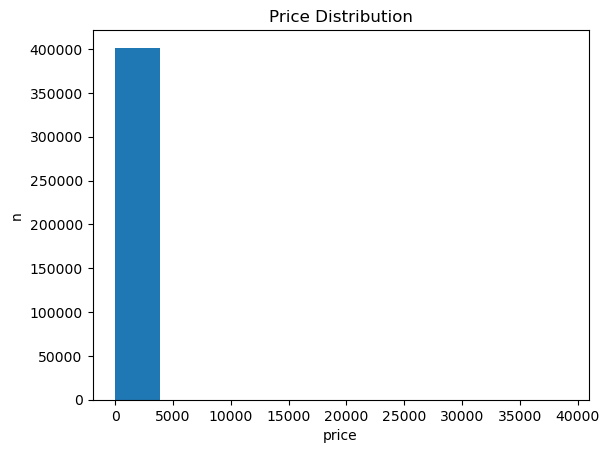

In [15]:
# histogram
plt.hist(df['Price'], bins=10)
plt.title('Price Distribution')


plt.ylabel('n')
plt.xlabel('price')
plt.show()

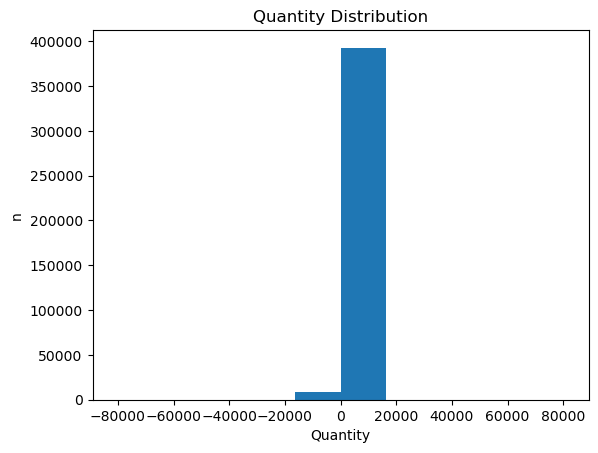

In [16]:
# histogram
plt.hist(df['Quantity'], bins=10)
plt.title('Quantity Distribution')
#plt.xlim
plt.ylabel('n')
plt.xlabel('Quantity')
plt.show()

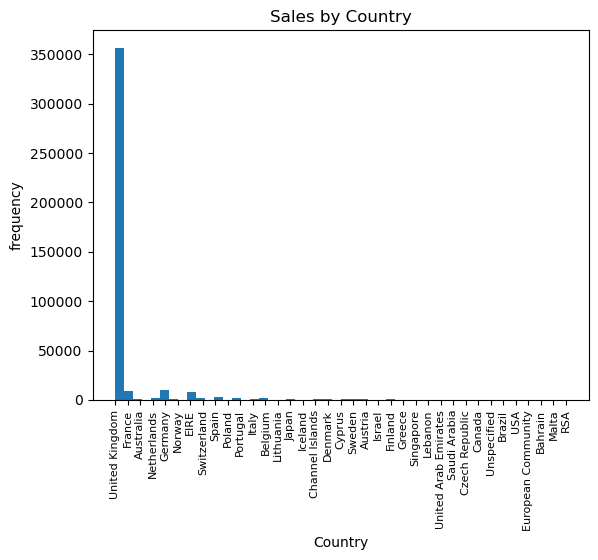

In [17]:
# histogram
plt.hist(df['Country'], bins=50)
plt.title('Sales by Country')
plt.ylabel('frequency')
plt.xlabel('Country')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

In [18]:
df

,Description,Quantity,Date,Price,ID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,'CHILDREN''S APRON DOLLY GIRL ',6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<Axes: ylabel='Price'>

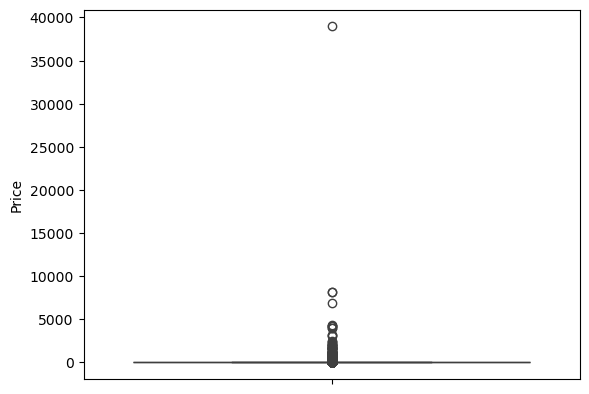

In [19]:
sns.boxplot(df['Price'])

<Axes: ylabel='Quantity'>

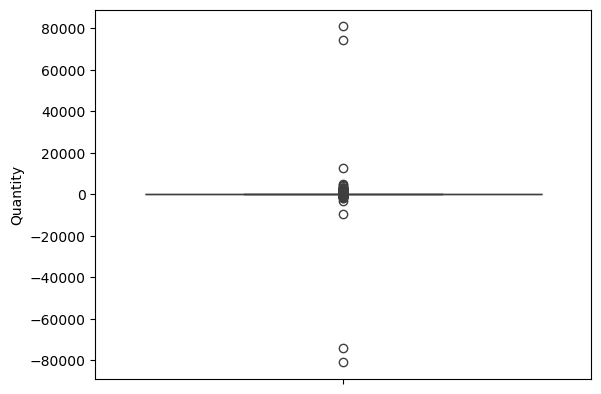

In [20]:
sns.boxplot(df['Quantity'])

## Seperate by Country

In [21]:
# getting top countries

countries = (df['Country'])
frequency = Counter(countries)

sort = sorted(frequency.items(), key = lambda f: f[1], reverse = True)

df_country_freq = pd.DataFrame(sort, columns = ['Country', 'Frequency'])


total_frequency = df_country_freq['Frequency'].sum()

df_country_freq['CF'] = df_country_freq['Frequency'].cumsum()/total_frequency *100
  
sort

[('United Kingdom', 356728),
 ('Germany', 9480),
 ('France', 8475),
 ('EIRE', 7475),
 ('Spain', 2528),
 ('Netherlands', 2371),
 ('Belgium', 2069),
 ('Switzerland', 1877),
 ('Portugal', 1471),
 ('Australia', 1258),
 ('Norway', 1086),
 ('Italy', 803),
 ('Channel Islands', 757),
 ('Finland', 695),
 ('Cyprus', 611),
 ('Sweden', 461),
 ('Austria', 401),
 ('Denmark', 389),
 ('Japan', 358),
 ('Poland', 341),
 ('USA', 291),
 ('Israel', 247),
 ('Unspecified', 241),
 ('Singapore', 229),
 ('Iceland', 182),
 ('Canada', 151),
 ('Greece', 146),
 ('Malta', 127),
 ('United Arab Emirates', 68),
 ('European Community', 61),
 ('RSA', 58),
 ('Lebanon', 45),
 ('Lithuania', 35),
 ('Brazil', 32),
 ('Czech Republic', 30),
 ('Bahrain', 17),
 ('Saudi Arabia', 10)]

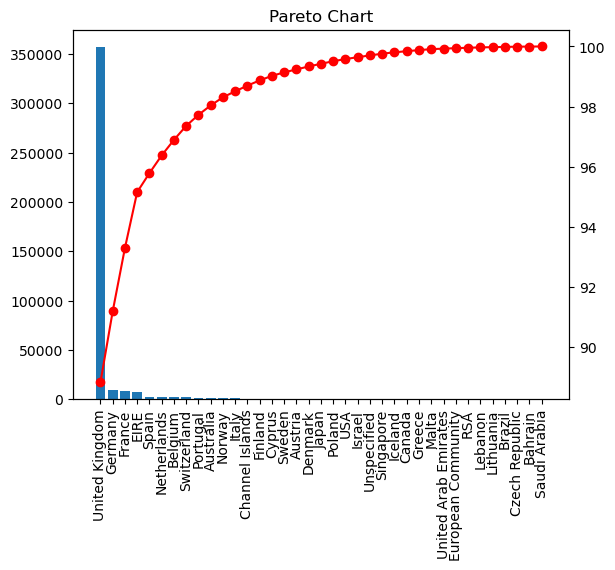

In [22]:
#twin axis
fig, ax = plt.subplots()

ax.bar(df_country_freq['Country'], df_country_freq['Frequency'])
plt.xticks(rotation = 90, fontsize = 10)

ax2 =  ax.twinx()
ax2.plot(df_country_freq['Country'], df_country_freq['CF'], marker = 'o', color = 'red')

plt.xticks(rotation = 90, fontsize = 10)
plt.title('Pareto Chart')

plt.show()

The pareto chart tells us that most pf the sales is from United Kingdom. In this given set of data, it is obvious however, the use of mareto charts wil be more apparent the more the data is spread out.

### Sales

In [23]:
df.head()

,Description,Quantity,Date,Price,ID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [24]:
#counting buyer IDs

IDs = (df['ID'])
frequency  = Counter(IDs)
sort = sorted(frequency.items(), key = lambda f: f[1], reverse = True)

## Date Processing

In [25]:
df

,Description,Quantity,Date,Price,ID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,'CHILDREN''S APRON DOLLY GIRL ',6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [26]:
df_date_time_split = df.drop('Date', axis=1)

df_date_time_split['Month'] = [dt.split('/')[0] for dt in df['Date']]
df_date_time_split['Year'] = [dt.split('/')[2].split(' ')[0] for dt in df['Date']]
df_date_time_split['Time'] = [dt.split(' ')[1] for dt in df['Date']]

df_date_time_split

,Description,Quantity,Price,ID,Country,Month,Year,Time
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12,2010,8:26
1,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12,2010,8:26
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12,2010,8:26
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12,2010,8:26
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12,2010,8:26
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,12,2011,12:50
541905,'CHILDREN''S APRON DOLLY GIRL ',6,2.10,12680.0,France,12,2011,12:50
541906,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,12,2011,12:50
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,12,2011,12:50


Text(0.5, 1.0, 'Sales by Entries in the Data')

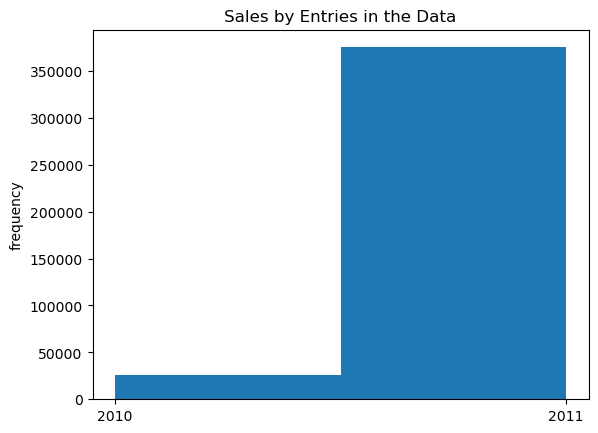

In [27]:
plt.hist('Year', data = df_date_time_split, bins = 2)
plt.ylabel('frequency')
plt.title('Sales by Entries in the Data')

In [28]:
df_date_time_split = df_date_time_split.drop(['Description', 'ID', 'Country'], axis=1)

df_date_time_split

,Quantity,Price,Month,Year,Time
0,6,2.55,12,2010,8:26
1,6,3.39,12,2010,8:26
2,8,2.75,12,2010,8:26
3,6,3.39,12,2010,8:26
4,6,3.39,12,2010,8:26
...,...,...,...,...,...
541904,12,0.85,12,2011,12:50
541905,6,2.10,12,2011,12:50
541906,4,4.15,12,2011,12:50
541907,4,4.15,12,2011,12:50


In [29]:
df_qp_dt = df_date_time_split
df_qp_dt['QxP'] = df_date_time_split['Quantity'] * df_date_time_split['Price']

df_qp_dt = df_qp_dt.drop(['Quantity', 'Price'], axis=1)
df_qp_dt

,Month,Year,Time,QxP
0,12,2010,8:26,15.30
1,12,2010,8:26,20.34
2,12,2010,8:26,22.00
3,12,2010,8:26,20.34
4,12,2010,8:26,20.34
...,...,...,...,...
541904,12,2011,12:50,10.20
541905,12,2011,12:50,12.60
541906,12,2011,12:50,16.60
541907,12,2011,12:50,16.60


In [30]:
df_qp_dt['mm_yyyy'] = df_qp_dt['Month'] + ' ' + df_qp_dt['Year']
df_qp_dt = df_qp_dt.drop(['Month', 'Year'], axis=1)
df_qp_dt

,Time,QxP,mm_yyyy
0,8:26,15.30,12 2010
1,8:26,20.34,12 2010
2,8:26,22.00,12 2010
3,8:26,20.34,12 2010
4,8:26,20.34,12 2010
...,...,...,...
541904,12:50,10.20,12 2011
541905,12:50,12.60,12 2011
541906,12:50,16.60,12 2011
541907,12:50,16.60,12 2011


In [31]:
df_qp_dt = df_qp_dt.drop('Time', axis=1)
df_qp_dt

,QxP,mm_yyyy
0,15.30,12 2010
1,20.34,12 2010
2,22.00,12 2010
3,20.34,12 2010
4,20.34,12 2010
...,...,...
541904,10.20,12 2011
541905,12.60,12 2011
541906,16.60,12 2011
541907,16.60,12 2011


In [32]:
df_qp_dt['mm_yyyy']

0         12 2010
1         12 2010
2         12 2010
3         12 2010
4         12 2010
           ...   
541904    12 2011
541905    12 2011
541906    12 2011
541907    12 2011
541908    12 2011
Name: mm_yyyy, Length: 401604, dtype: object

In [33]:
 monthly = []

In [34]:
for entry in df_qp_dt['mm_yyyy']:
    if entry not in monthly:
        monthly.append(entry)
    else:
        None
monthly

['12 2010',
 '1 2011',
 '2 2011',
 '3 2011',
 '4 2011',
 '5 2011',
 '6 2011',
 '7 2011',
 '8 2011',
 '9 2011',
 '10 2011',
 '11 2011',
 '12 2011']

In [35]:
qp_sums = []

In [36]:
#df_qp_dt.loc[:,'QxP'][entry == df_qp_dt.loc[:,'mm_yyyy']]

In [37]:
for entry in monthly:
    qp = df_qp_dt.loc[:, 'QxP'][entry == df_qp_dt.loc[:, 'mm_yyyy']].sum()
    qp_sums.append(qp)

qp_sums

[552372.86,
 473731.9,
 435534.07,
 578576.21,
 425222.671,
 647011.6699999999,
 606862.52,
 573112.321,
 615078.09,
 929356.232,
 973306.38,
 1126815.07,
 341539.43]

In [38]:
def replace_numbers_with_text(arr):
    months = {
        '1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr',
        '5': 'May', '6': 'Jun', '7': 'Jul', '8': 'Aug',
        '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
    }
    new_arr = []
    for string in arr:
        string = string.split(sep = ' ')
        for num, month in months.items():
            string[0] = string[0].replace(num, month)
        new_arr.append(string[0])
    return new_arr

In [39]:
replace_numbers_with_text(monthly)
monthly

['12 2010',
 '1 2011',
 '2 2011',
 '3 2011',
 '4 2011',
 '5 2011',
 '6 2011',
 '7 2011',
 '8 2011',
 '9 2011',
 '10 2011',
 '11 2011',
 '12 2011']

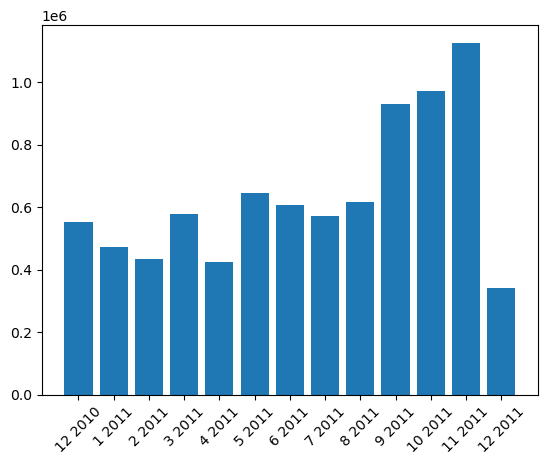

In [40]:
plt.bar(monthly, qp_sums)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

The plot shows the 'sales' where 'sales' is defined to be the total number of items multiplie dby the price of the item per unit. Plot shows that peak no. of sales occur suring the latter months of the year. This can be attributed to people buying gifts for the holidays.

The visible plummet in sales during December 2011 is inconclusive because the available retail data is only up to the 1st week of December. 

## Count items

In [41]:
df

,Description,Quantity,Date,Price,ID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,'CHILDREN''S APRON DOLLY GIRL ',6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [42]:
df_count_items = df.drop(columns = ['Date', 'Price', 'ID', 'Country'])
df_count_items

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,6
1,WHITE METAL LANTERN,6
2,CREAM CUPID HEARTS COAT HANGER,8
3,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12
541905,'CHILDREN''S APRON DOLLY GIRL ',6
541906,CHILDRENS CUTLERY DOLLY GIRL,4
541907,CHILDRENS CUTLERY CIRCUS PARADE,4


In [43]:
items = []

for item in df_count_items['Description']:
    if item not in items:
        items.append(item)
    else:
        continue

items

['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 "'POPPY''S PLAYHOUSE BEDROOM '",
 "'POPPY''S PLAYHOUSE KITCHEN'",
 'FELTCRAFT PRINCESS CHARLOTTE DOLL',
 'IVORY KNITTED MUG COSY ',
 'BOX OF 6 ASSORTED COLOUR TEASPOONS',
 'BOX OF VINTAGE JIGSAW BLOCKS ',
 'BOX OF VINTAGE ALPHABET BLOCKS',
 'HOME BUILDING BLOCK WORD',
 'LOVE BUILDING BLOCK WORD',
 'RECIPE BOX WITH METAL HEART',
 'DOORMAT NEW ENGLAND',
 'JAM MAKING SET WITH JARS',
 'RED COAT RACK PARIS FASHION',
 'YELLOW COAT RACK PARIS FASHION',
 'BLUE COAT RACK PARIS FASHION',
 'BATH BUILDING BLOCK WORD',
 'ALARM CLOCK BAKELIKE PINK',
 'ALARM CLOCK BAKELIKE RED ',
 'ALARM CLOCK BAKELIKE GREEN',
 'PANDA AND BUNNIES STICKER SHEET',
 'STARS GIFT TAPE ',
 'IN

In [44]:
len(items)

3896

In [45]:
item_sum = []

for item in items:
    i_tot = df_count_items.loc[:, 'Quantity'][item == df_count_items['Description']].sum()
    item_sum.append(i_tot)

item_sum

[34128,
 1547,
 1875,
 2451,
 3657,
 1527,
 483,
 4704,
 120,
 35215,
 1767,
 1874,
 2210,
 531,
 293,
 902,
 1282,
 2622,
 1919,
 2,
 3694,
 7905,
 323,
 264,
 422,
 776,
 5025,
 7135,
 5598,
 372,
 1367,
 823,
 7082,
 2115,
 8035,
 13854,
 10753,
 3338,
 5052,
 12689,
 2613,
 302,
 2450,
 4368,
 25880,
 3002,
 15138,
 1621,
 2481,
 4591,
 839,
 1493,
 2121,
 1335,
 8023,
 5963,
 364,
 3695,
 7692,
 19692,
 12490,
 920,
 6767,
 1515,
 1170,
 7351,
 17024,
 3697,
 2832,
 33386,
 12035,
 24129,
 17514,
 477,
 977,
 1243,
 11179,
 9666,
 14708,
 4197,
 5,
 10148,
 495,
 4475,
 1967,
 5627,
 204,
 915,
 2560,
 1278,
 4252,
 10082,
 9471,
 47,
 19,
 4218,
 1653,
 316,
 510,
 2594,
 2034,
 1275,
 300,
 2649,
 3777,
 3888,
 486,
 887,
 691,
 453,
 3082,
 -1194,
 1571,
 779,
 6010,
 3140,
 1597,
 551,
 348,
 524,
 462,
 357,
 5889,
 15498,
 3061,
 69,
 8375,
 16633,
 9509,
 683,
 901,
 8180,
 1950,
 218,
 683,
 3085,
 2891,
 127,
 6511,
 292,
 44963,
 9566,
 1315,
 1507,
 2015,
 193,
 708,
 3

In [46]:
df_item_sold = pd.DataFrame({
    'item': items,
    'no. sold' : item_sum
})

# sort

df_item_sold = df_item_sold.sort_values(by = 'no. sold', ascending = False)
df_item_sold



,item,no. sold
970,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
140,JUMBO BAG RED RETROSPOT,44963
9,ASSORTED COLOUR BIRD ORNAMENT,35215
0,WHITE HANGING HEART T-LIGHT HOLDER,34128
69,PACK OF 72 RETROSPOT CAKE CASES,33386
...,...,...
2441,PINK POODLE HANGING DECORATION,-12
3544,CRUK Commission,-16
2471,ASSORTED TUTTI FRUTTI ROUND BOX,-24
111,Discount,-1194


In [47]:
df_top_items = df_item_sold[:10]

df_top_items

,item,no. sold
970,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
140,JUMBO BAG RED RETROSPOT,44963
9,ASSORTED COLOUR BIRD ORNAMENT,35215
0,WHITE HANGING HEART T-LIGHT HOLDER,34128
69,PACK OF 72 RETROSPOT CAKE CASES,33386
3277,POPCORN HOLDER,30492
3110,RABBIT NIGHT LIGHT,27045
44,MINI PAINT SET VINTAGE,25880
414,PACK OF 12 LONDON TISSUES,25305
71,PACK OF 60 PINK PAISLEY CAKE CASES,24129


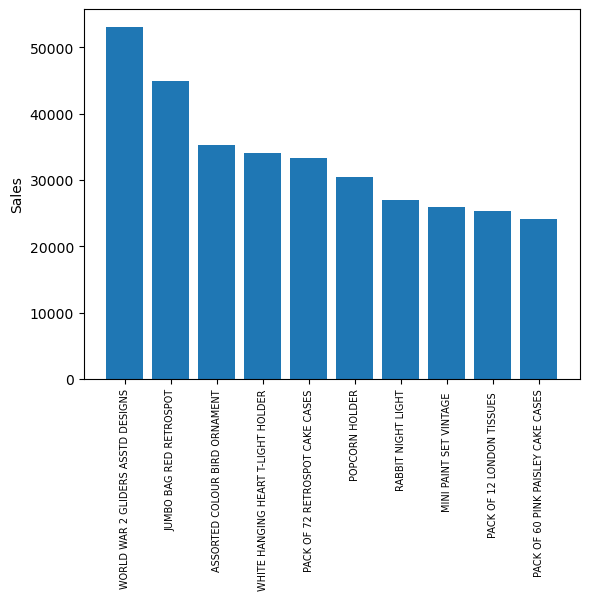

In [48]:
plt.bar(df_top_items['item'], df_top_items['no. sold'])
plt.xticks(rotation = 90, fontsize = 7)
plt.ylabel('Sales')
plt.show()

The figure above shows top 10 items in terms of 'sales' where 'sales' is defined to be the total number of units sold per item multiplied the price of the item per unit.